# Noise Feature Shape Check and Visualization

Check the shape and visualize the predicted noise features from DenoisingGait preprocessing.


In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

NOISE_PATH = '/data0/aix23907/gait/CCPG_DenoisingGait/000/U0_D0/01_0/00-DenoisingFea_96x48.pkl'

print(f"Loading noise file: {NOISE_PATH}")

with open(NOISE_PATH, 'rb') as f:
    noise_data = pickle.load(f)

print(f"\nShape: {noise_data.shape}")
print(f"Expected shape: (frames, 4, 96, 48)")
print(f"Data type: {noise_data.dtype}")
print(f"Min value: {noise_data.min():.6f}")
print(f"Max value: {noise_data.max():.6f}")
print(f"Mean value: {noise_data.mean():.6f}")
print(f"Std value: {noise_data.std():.6f}")

if len(noise_data.shape) == 4:
    frames, channels, height, width = noise_data.shape
    print(f"\nShape breakdown:")
    print(f"  Frames: {frames}")
    print(f"  Channels: {channels} (should be 4)")
    print(f"  Height: {height} (should be 96)")
    print(f"  Width: {width} (should be 48)")
    
    if channels == 4 and height == 96 and width == 48:
        print("\n✓ Shape is correct: (frames, 4, 96, 48)")
    else:
        print("\n✗ Shape mismatch!")
        print(f"  Expected: (frames, 4, 96, 48)")
        print(f"  Got: ({frames}, {channels}, {height}, {width})")
else:
    print(f"\n✗ Wrong number of dimensions! Expected 4, got {len(noise_data.shape)}")


Loading noise file: /data0/aix23907/gait/CCPG_DenoisingGait/000/U0_D0/01_0/00-DenoisingFea_96x48.pkl

Shape: (233, 4, 96, 48)
Expected shape: (frames, 4, 96, 48)
Data type: float32
Min value: -5.055693
Max value: 5.107232
Mean value: -0.001165
Std value: 0.992107

Shape breakdown:
  Frames: 233
  Channels: 4 (should be 4)
  Height: 96 (should be 96)
  Width: 48 (should be 48)

✓ Shape is correct: (frames, 4, 96, 48)


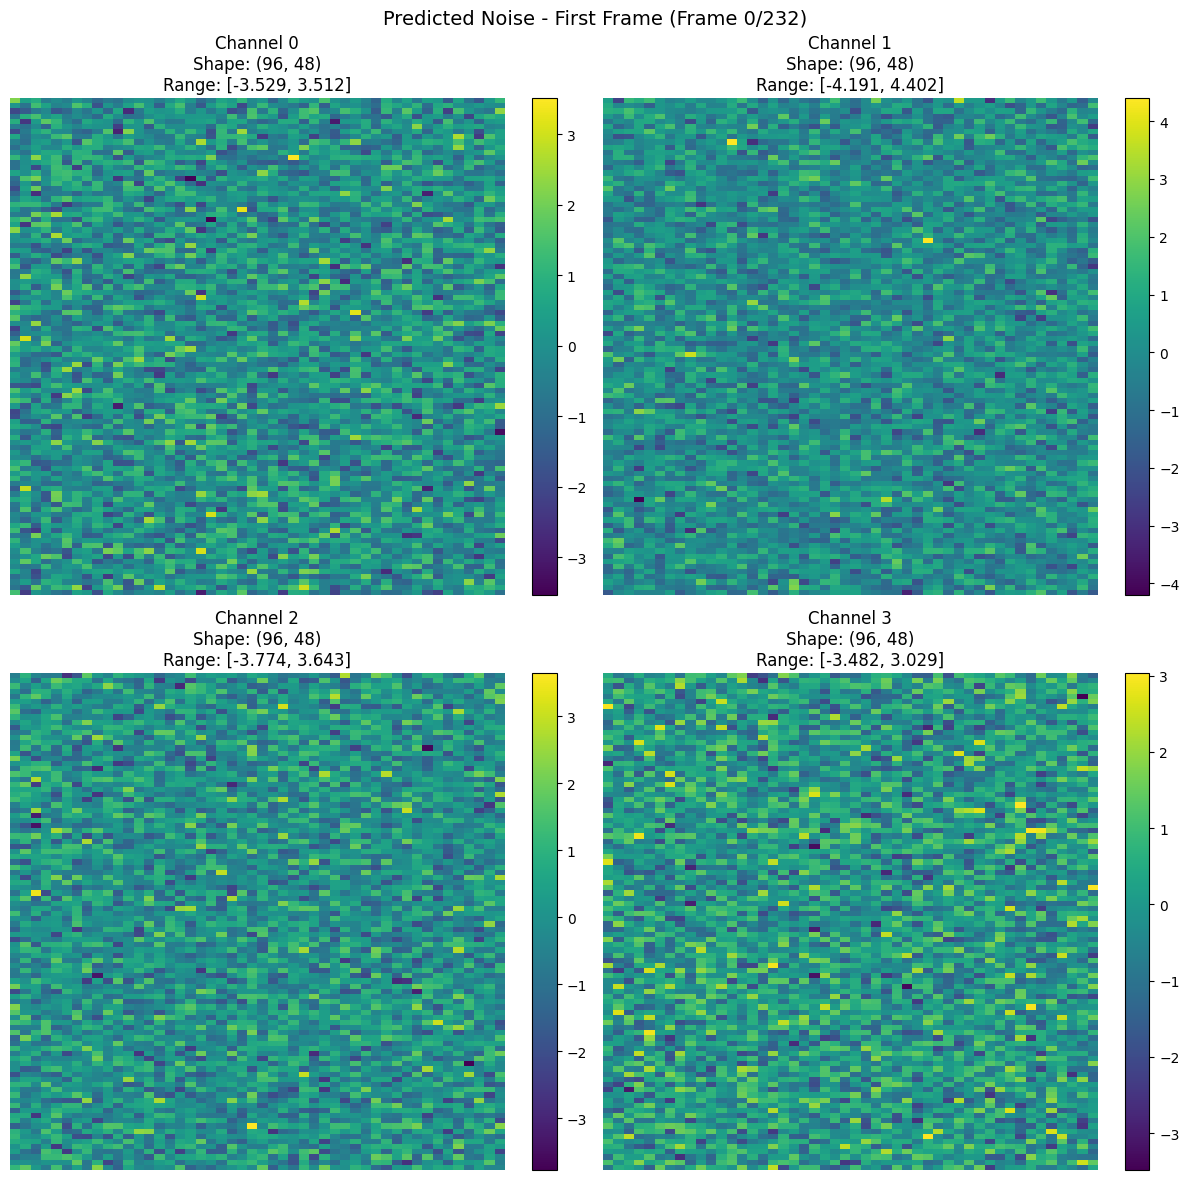


First frame noise statistics:
  Shape: (4, 96, 48)
  Min: -4.191401
  Max: 4.401742
  Mean: 0.002669
  Std: 0.986067


In [2]:
# Visualize noise features for first frame
if len(noise_data.shape) == 4:
    frames, channels, height, width = noise_data.shape
    
    # Get first frame
    first_frame_noise = noise_data[0]  # Shape: (4, 96, 48)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()
    
    for ch in range(4):
        channel_data = first_frame_noise[ch]  # Shape: (96, 48)
        
        im = axes[ch].imshow(channel_data, cmap='viridis', aspect='auto')
        axes[ch].set_title(f'Channel {ch}\nShape: {channel_data.shape}\nRange: [{channel_data.min():.3f}, {channel_data.max():.3f}]')
        axes[ch].axis('off')
        plt.colorbar(im, ax=axes[ch], fraction=0.046)
    
    plt.suptitle(f'Predicted Noise - First Frame (Frame 0/{frames-1})', fontsize=14, y=0.98)
    plt.tight_layout()
    plt.show()
    
    print(f"\nFirst frame noise statistics:")
    print(f"  Shape: {first_frame_noise.shape}")
    print(f"  Min: {first_frame_noise.min():.6f}")
    print(f"  Max: {first_frame_noise.max():.6f}")
    print(f"  Mean: {first_frame_noise.mean():.6f}")
    print(f"  Std: {first_frame_noise.std():.6f}")
else:
    print("Cannot visualize: Wrong shape!")


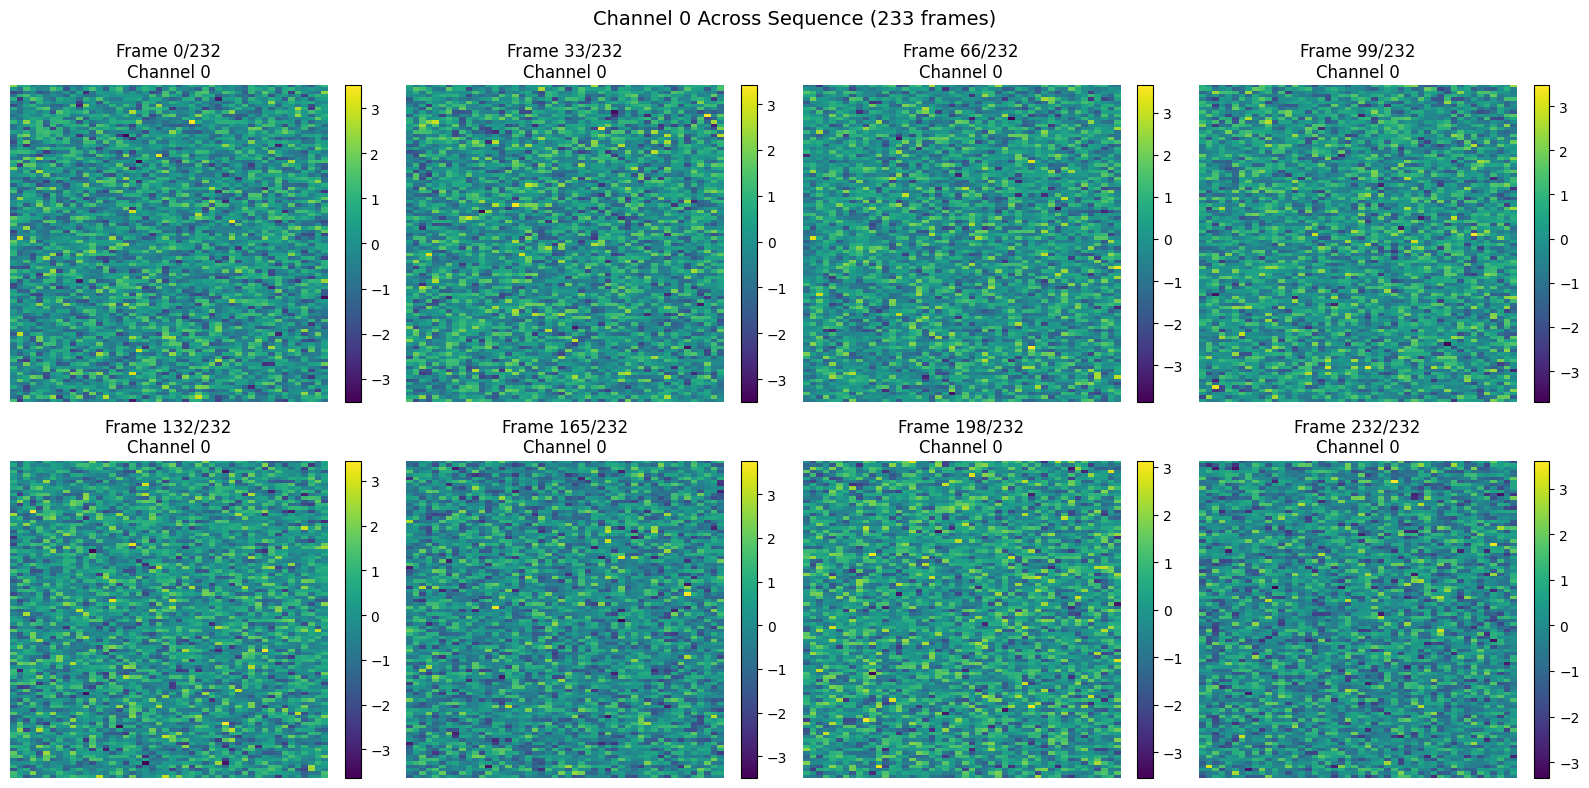

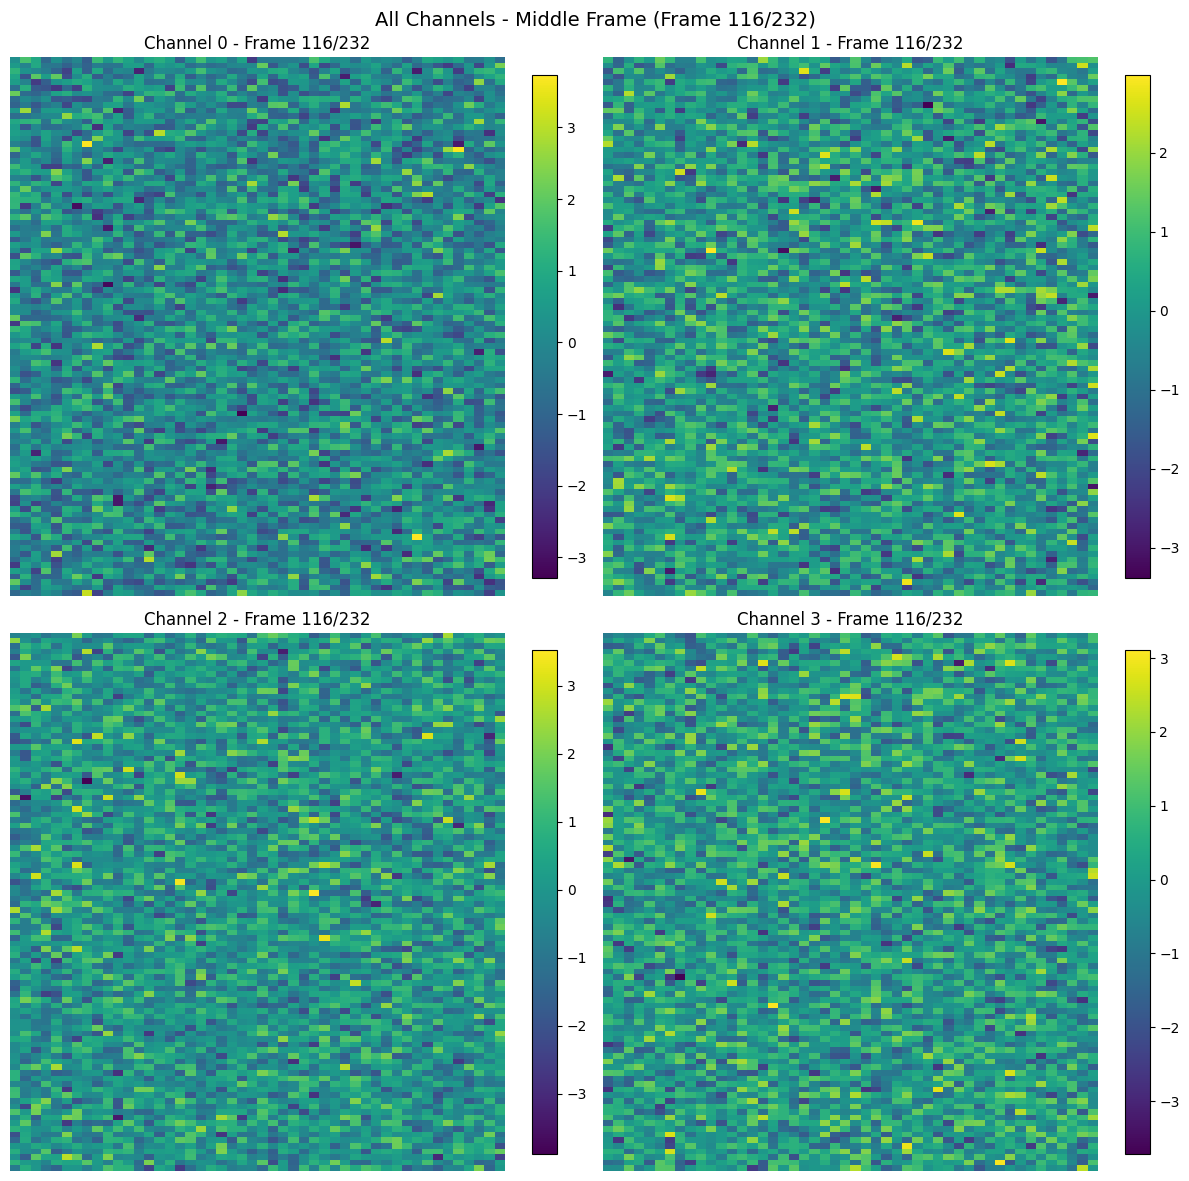

In [3]:
# Visualize multiple frames across the sequence
if len(noise_data.shape) == 4:
    frames, channels, height, width = noise_data.shape
    
    # Sample frames evenly
    num_samples = min(8, frames)
    frame_indices = np.linspace(0, frames - 1, num_samples, dtype=int)
    
    # Visualize channel 0 across frames
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    
    for idx, frame_idx in enumerate(frame_indices):
        channel_0 = noise_data[frame_idx, 0]  # Shape: (96, 48)
        
        im = axes[idx].imshow(channel_0, cmap='viridis', aspect='auto')
        axes[idx].set_title(f'Frame {frame_idx}/{frames-1}\nChannel 0')
        axes[idx].axis('off')
        plt.colorbar(im, ax=axes[idx], fraction=0.046)
    
    plt.suptitle(f'Channel 0 Across Sequence ({frames} frames)', fontsize=14, y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Visualize all channels for middle frame
    if frames > 0:
        mid_frame_idx = frames // 2
        mid_frame_noise = noise_data[mid_frame_idx]  # Shape: (4, 96, 48)
        
        fig, axes = plt.subplots(2, 2, figsize=(12, 12))
        axes = axes.flatten()
        
        for ch in range(4):
            channel_data = mid_frame_noise[ch]
            im = axes[ch].imshow(channel_data, cmap='viridis', aspect='auto')
            axes[ch].set_title(f'Channel {ch} - Frame {mid_frame_idx}/{frames-1}')
            axes[ch].axis('off')
            plt.colorbar(im, ax=axes[ch], fraction=0.046)
        
        plt.suptitle(f'All Channels - Middle Frame (Frame {mid_frame_idx}/{frames-1})', fontsize=14, y=0.98)
        plt.tight_layout()
        plt.show()


In [ ]:
# Statistics across all frames
if len(noise_data.shape) == 4:
    frames, channels, height, width = noise_data.shape
    
    print("=" * 60)
    print("STATISTICS ACROSS ALL FRAMES")
    print("=" * 60)
    
    for ch in range(channels):
        channel_all_frames = noise_data[:, ch, :, :]  # Shape: (frames, 96, 48)
        print(f"\nChannel {ch}:")
        print(f"  Shape: {channel_all_frames.shape}")
        print(f"  Min: {channel_all_frames.min():.6f}")
        print(f"  Max: {channel_all_frames.max():.6f}")
        print(f"  Mean: {channel_all_frames.mean():.6f}")
        print(f"  Std: {channel_all_frames.std():.6f}")
    
    print(f"\nOverall statistics:")
    print(f"  Total frames: {frames}")
    print(f"  Total elements: {noise_data.size:,}")
    print(f"  Memory size: {noise_data.nbytes / 1024 / 1024:.2f} MB")
